In [102]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

In [120]:
mnist = tf.keras.datasets.fashion_mnist

In [121]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [122]:
print('train_set : ',x_train.shape,y_train.shape )
print('test_set : ', x_test.shape,y_test.shape)

train_set :  (60000, 28, 28) (60000,)
test_set :  (10000, 28, 28) (10000,)


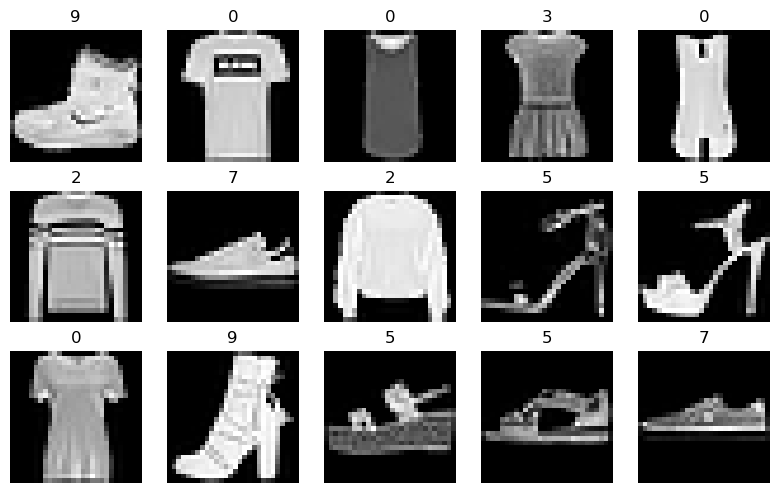

In [123]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax=axes[i//5,i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i],cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [131]:
# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [132]:
# 레이블을 원-핫 인코딩으로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [133]:
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [134]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [135]:
# 콜백 설정 (optional)
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs')]

In [137]:
#모델 훈련
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=callbacks)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7697 - loss: 0.6410 - val_accuracy: 0.8518 - val_loss: 0.4123
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8611 - loss: 0.3773 - val_accuracy: 0.8561 - val_loss: 0.4125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8755 - loss: 0.3367 - val_accuracy: 0.8676 - val_loss: 0.3614
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8841 - loss: 0.3097 - val_accuracy: 0.8645 - val_loss: 0.3703
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8943 - loss: 0.2853 - val_accuracy: 0.8709 - val_loss: 0.3567
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8955 - loss: 0.2767 - val_accuracy: 0.8756 - val_loss: 0.3558
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9033 - loss: 0.2615 - val_accuracy: 0.8826 - val_loss: 0.3296
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9071 - loss: 0.2466 - 

In [138]:
test_loss, test_acc = model.evaluate(x_test,y_test)

print('검증 셋 정확도:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8780 - loss: 0.3574
검증 셋 정확도: 0.8784999847412109


In [139]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [140]:
predictions[0]

array([4.3255164e-07, 3.1425241e-06, 1.5514559e-08, 3.5349093e-08,
       1.1988774e-07, 1.8990020e-05, 1.5684460e-05, 2.1901315e-02,
       3.2198244e-08, 9.7806019e-01], dtype=float32)

In [141]:
import numpy as np

#0번 인덱스에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개에 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

9
[9 2 1 1 0 1 4 6 5 7]


In [142]:

# 예측 결과 시각화 함수
def get_one_result(i):
    img = x_test[i]
    y_true = y_test[i]
    y_pred = model.predict(img.reshape(1, 28, 28))
    confidence = y_pred.max()
    y_pred = y_pred.argmax()
    y_true = y_true.argmax()
    return img, y_true, y_pred, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


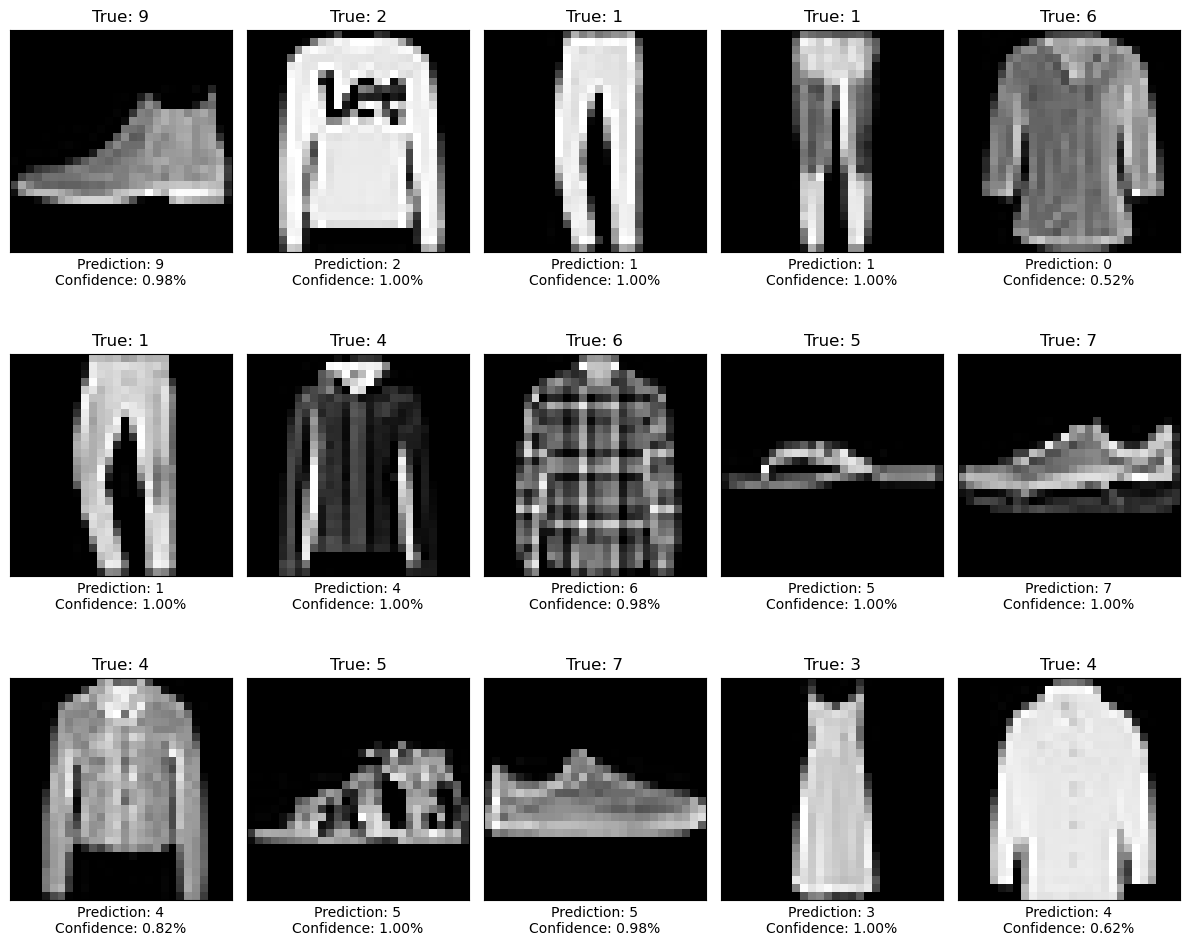

In [143]:
# 시각화
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: {confidence:.2f}%')
plt.tight_layout()
plt.show()
